# <span style = "color: green"> <span style = "color: green">Delayed Flights Project</span> </span>

1. **Problem Definition**:
   - Define the problem you want to solve with this dataset. For instance, you might want to predict flight delays, flight cancellations, or optimize flight scheduling.

2. **Data Collection and Preprocessing**:
   - Collect the dataset containing flight information.
   - Preprocess the data:
     - Handle missing values.
     - Convert categorical variables into numerical format (e.g., one-hot encoding for 'UniqueCarrier').
     - Feature engineering: Extract additional features if needed, such as flight duration, time of day (morning, afternoon, evening), etc.
     - Split the dataset into training and testing sets.

3. **Exploratory Data Analysis (EDA)**:
   - Perform EDA to gain insights into the data:
     - Explore distributions of features.
     - Analyze correlations between features.
     - Visualize relationships between variables.
     - Understand the frequency of flight delays, cancellations, etc.

4. **Model Selection**:
   - Choose appropriate machine learning models for the problem:
     - For binary classification tasks (e.g., predicting flight delays), models like Logistic Regression, Random Forest, Gradient Boosting Machines, or Neural Networks can be considered.
     - For regression tasks (e.g., predicting flight arrival time), models like Linear Regression, Random Forest Regression, or Gradient Boosting Regression can be used.

5. **Model Training**:
   - Train the selected models on the training dataset.
   - Tune hyperparameters using techniques like grid search or randomized search to optimize model performance.

6. **Model Evaluation**:
   - Evaluate the trained models using appropriate evaluation metrics:
     - For classification tasks: Accuracy, Precision, Recall, F1-score, ROC-AUC, etc.
     - For regression tasks: Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared, etc.

7. **Model Interpretation**:
   - Interpret the trained models to understand the factors influencing flight delays, cancellations, etc. This can involve analyzing feature importance, partial dependence plots, or SHAP values.

8. **Deployment**:
   - Deploy the trained model into production if applicable. This could involve creating a web service, integrating it into an existing application, or deploying it as a standalone application.

9. **Monitoring and Maintenance**:
   - Continuously monitor the model's performance in production.
   - Retrain or update the model periodically with new data to maintain its accuracy and relevance.

10. **Documentation**:
    - Document the entire project including data preprocessing steps, model selection, training, evaluation, and deployment for future reference.



### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read dataset

In [2]:
data=pd.read_csv('DelayedFlights.csv')[:150000]

In [3]:
data.head()

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   
3   1959.0        1925            WN  ...     3.0    10.0          0   
4   2121.0        2110            WN  ...     4.0    10.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN           NaN      NaN   
1                 N         0           NaN           NaN      NaN   
2                 N         0           NaN           NaN      NaN   
3                 N         0           2.0           0.0      0.0   
4                 N         0           NaN           NaN      NaN   

  SecurityDelay  LateAircraftDelay  
0           NaN                NaN  
1           NaN                NaN  
2           NaN                NaN  
3           0.0               32.0  
4           NaN                NaN  

[5 rows x 30 columns]

# <span style = "color: orange"> EDA Process</span>

### Check shape 

In [4]:
data.shape

(150000, 30)

### View info about dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         150000 non-null  int64  
 1   Year               150000 non-null  int64  
 2   Month              150000 non-null  int64  
 3   DayofMonth         150000 non-null  int64  
 4   DayOfWeek          150000 non-null  int64  
 5   DepTime            150000 non-null  float64
 6   CRSDepTime         150000 non-null  int64  
 7   ArrTime            149531 non-null  float64
 8   CRSArrTime         150000 non-null  int64  
 9   UniqueCarrier      150000 non-null  object 
 10  FlightNum          150000 non-null  int64  
 11  TailNum            150000 non-null  object 
 12  ActualElapsedTime  149531 non-null  float64
 13  CRSElapsedTime     149965 non-null  float64
 14  AirTime            149531 non-null  float64
 15  ArrDelay           149531 non-null  float64
 16  De

### View basic statistical information about dataset

In [6]:
data.describe()

Unnamed: 0      Year     Month     DayofMonth      DayOfWeek  \
count  150000.000000  150000.0  150000.0  150000.000000  150000.000000   
mean   241607.476447    2008.0       1.0      15.366880       3.887140   
std    142590.935391       0.0       0.0       9.514924       1.914165   
min         0.000000    2008.0       1.0       1.000000       1.000000   
25%    117025.750000    2008.0       1.0       6.000000       2.000000   
50%    239807.000000    2008.0       1.0      17.000000       4.000000   
75%    359713.500000    2008.0       1.0      24.000000       5.000000   
max    491015.000000    2008.0       1.0      31.000000       7.000000   

             DepTime     CRSDepTime        ArrTime     CRSArrTime  \
count  150000.000000  150000.000000  149531.000000  150000.000000   
mean     1505.712053    1450.538380    1607.285466    1613.511820   
std       445.582162     423.913172     525.507167     455.141562   
min         1.000000      25.000000       1.000000       1.000000   
25%      1151.000000    1120.000000    1313.000000    1305.000000   
50%      1533.000000    1455.000000    1701.000000    1645.000000   
75%      1852.000000    1805.000000    2021.000000    2000.000000   
max      2400.000000    2359.000000    2400.000000    2400.000000   

           FlightNum  ...       Distance         TaxiIn        TaxiOut  \
count  150000.000000  ...  150000.000000  149531.000000  150000.000000   
mean     2565.642780  ...     682.305833       6.669881      17.684807   
std      2084.729872  ...     531.120932       5.258972      13.243917   
min         1.000000  ...      24.000000       0.000000       0.000000   
25%       680.000000  ...     321.000000       4.000000      10.000000   
50%      2008.000000  ...     534.000000       5.000000      14.000000   
75%      4179.000000  ...     862.000000       8.000000      21.000000   
max      7829.000000  ...    4502.000000     189.000000     383.000000   

       Cancelled       Diverted  CarrierDelay  WeatherDelay      NASDelay  \
count   150000.0  150000.000000  99113.000000  99113.000000  99113.000000   
mean         0.0       0.003127     19.779373      3.822556     13.794457   
std          0.0       0.055829     43.182642     22.812757     33.658143   
min          0.0       0.000000      0.000000      0.000000      0.000000   
25%          0.0       0.000000      0.000000      0.000000      0.000000   
50%          0.0       0.000000      3.000000      0.000000      0.000000   
75%          0.0       0.000000     22.000000      0.000000     12.000000   
max          0.0       1.000000   1120.000000   1049.000000    896.000000   

       SecurityDelay  LateAircraftDelay  
count   99113.000000       99113.000000  
mean        0.098352          25.805475  
std         1.755879          42.049489  
min         0.000000           0.000000  
25%         0.000000           0.000000  
50%         0.000000           9.000000  
75%         0.000000          34.000000  
max       136.000000         897.000000  

[8 rows x 25 columns]

### Check null values for dataset

In [7]:
data.isnull().sum()

Unnamed: 0               0
Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                469
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime      469
CRSElapsedTime          35
AirTime                469
ArrDelay               469
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 469
TaxiOut                  0
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         50887
WeatherDelay         50887
NASDelay             50887
SecurityDelay        50887
LateAircraftDelay    50887
dtype: int64

### Remove null values from dataset

In [8]:
data.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

### View unique values in all categorical columns

In [11]:
data.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [12]:
columns=['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay']
for i in columns:
    print('Unique elements in columns ',i,'---', data[i].unique())

Unique elements in columns  Year --- [2008]
Unique elements in columns  Month --- [1]
Unique elements in columns  DayofMonth --- [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31  2  1]
Unique elements in columns  DayOfWeek --- [4 5 6 7 1 2 3]
Unique elements in columns  DepTime --- [1829. 1937. 1644. ...  525.  139.  159.]
Unique elements in columns  CRSDepTime --- [1755 1830 1510 ...  652  505 2325]
Unique elements in columns  ArrTime --- [1959. 2037. 1845. ...  406.  540.  425.]
Unique elements in columns  CRSArrTime --- [1925 1940 1725 ...  549   46  540]
Unique elements in columns  FlightNum --- [3920  509 1333 ... 5897 5907 5959]
Unique elements in columns  TailNum --- ['N464WN' 'N763SW' 'N334SW' ... 'N4WMAA' 'N3CTAA' 'N480AA']
Unique elements in columns  ActualElapsedTime --- [ 90. 240. 121. 228. 123.  56.  57. 155. 147. 135. 153. 136.  69.  70.
  96. 143.  71.  99.  86. 127.  54.  75.  74.  83. 256. 124. 146. 275.
 196. 204.  98. 233.  66.

### Drop these columns that won'tbe useful in prediction

In [13]:
data.drop(columns=['Unnamed: 0','UniqueCarrier', 'Origin', 'FlightNum', 'TailNum', 'Dest', 'CancellationCode'],inplace=True)

# <span style = "color: orange"> Data Visualization </span>

### Pair plot of this dataset

C:\Users\sheri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


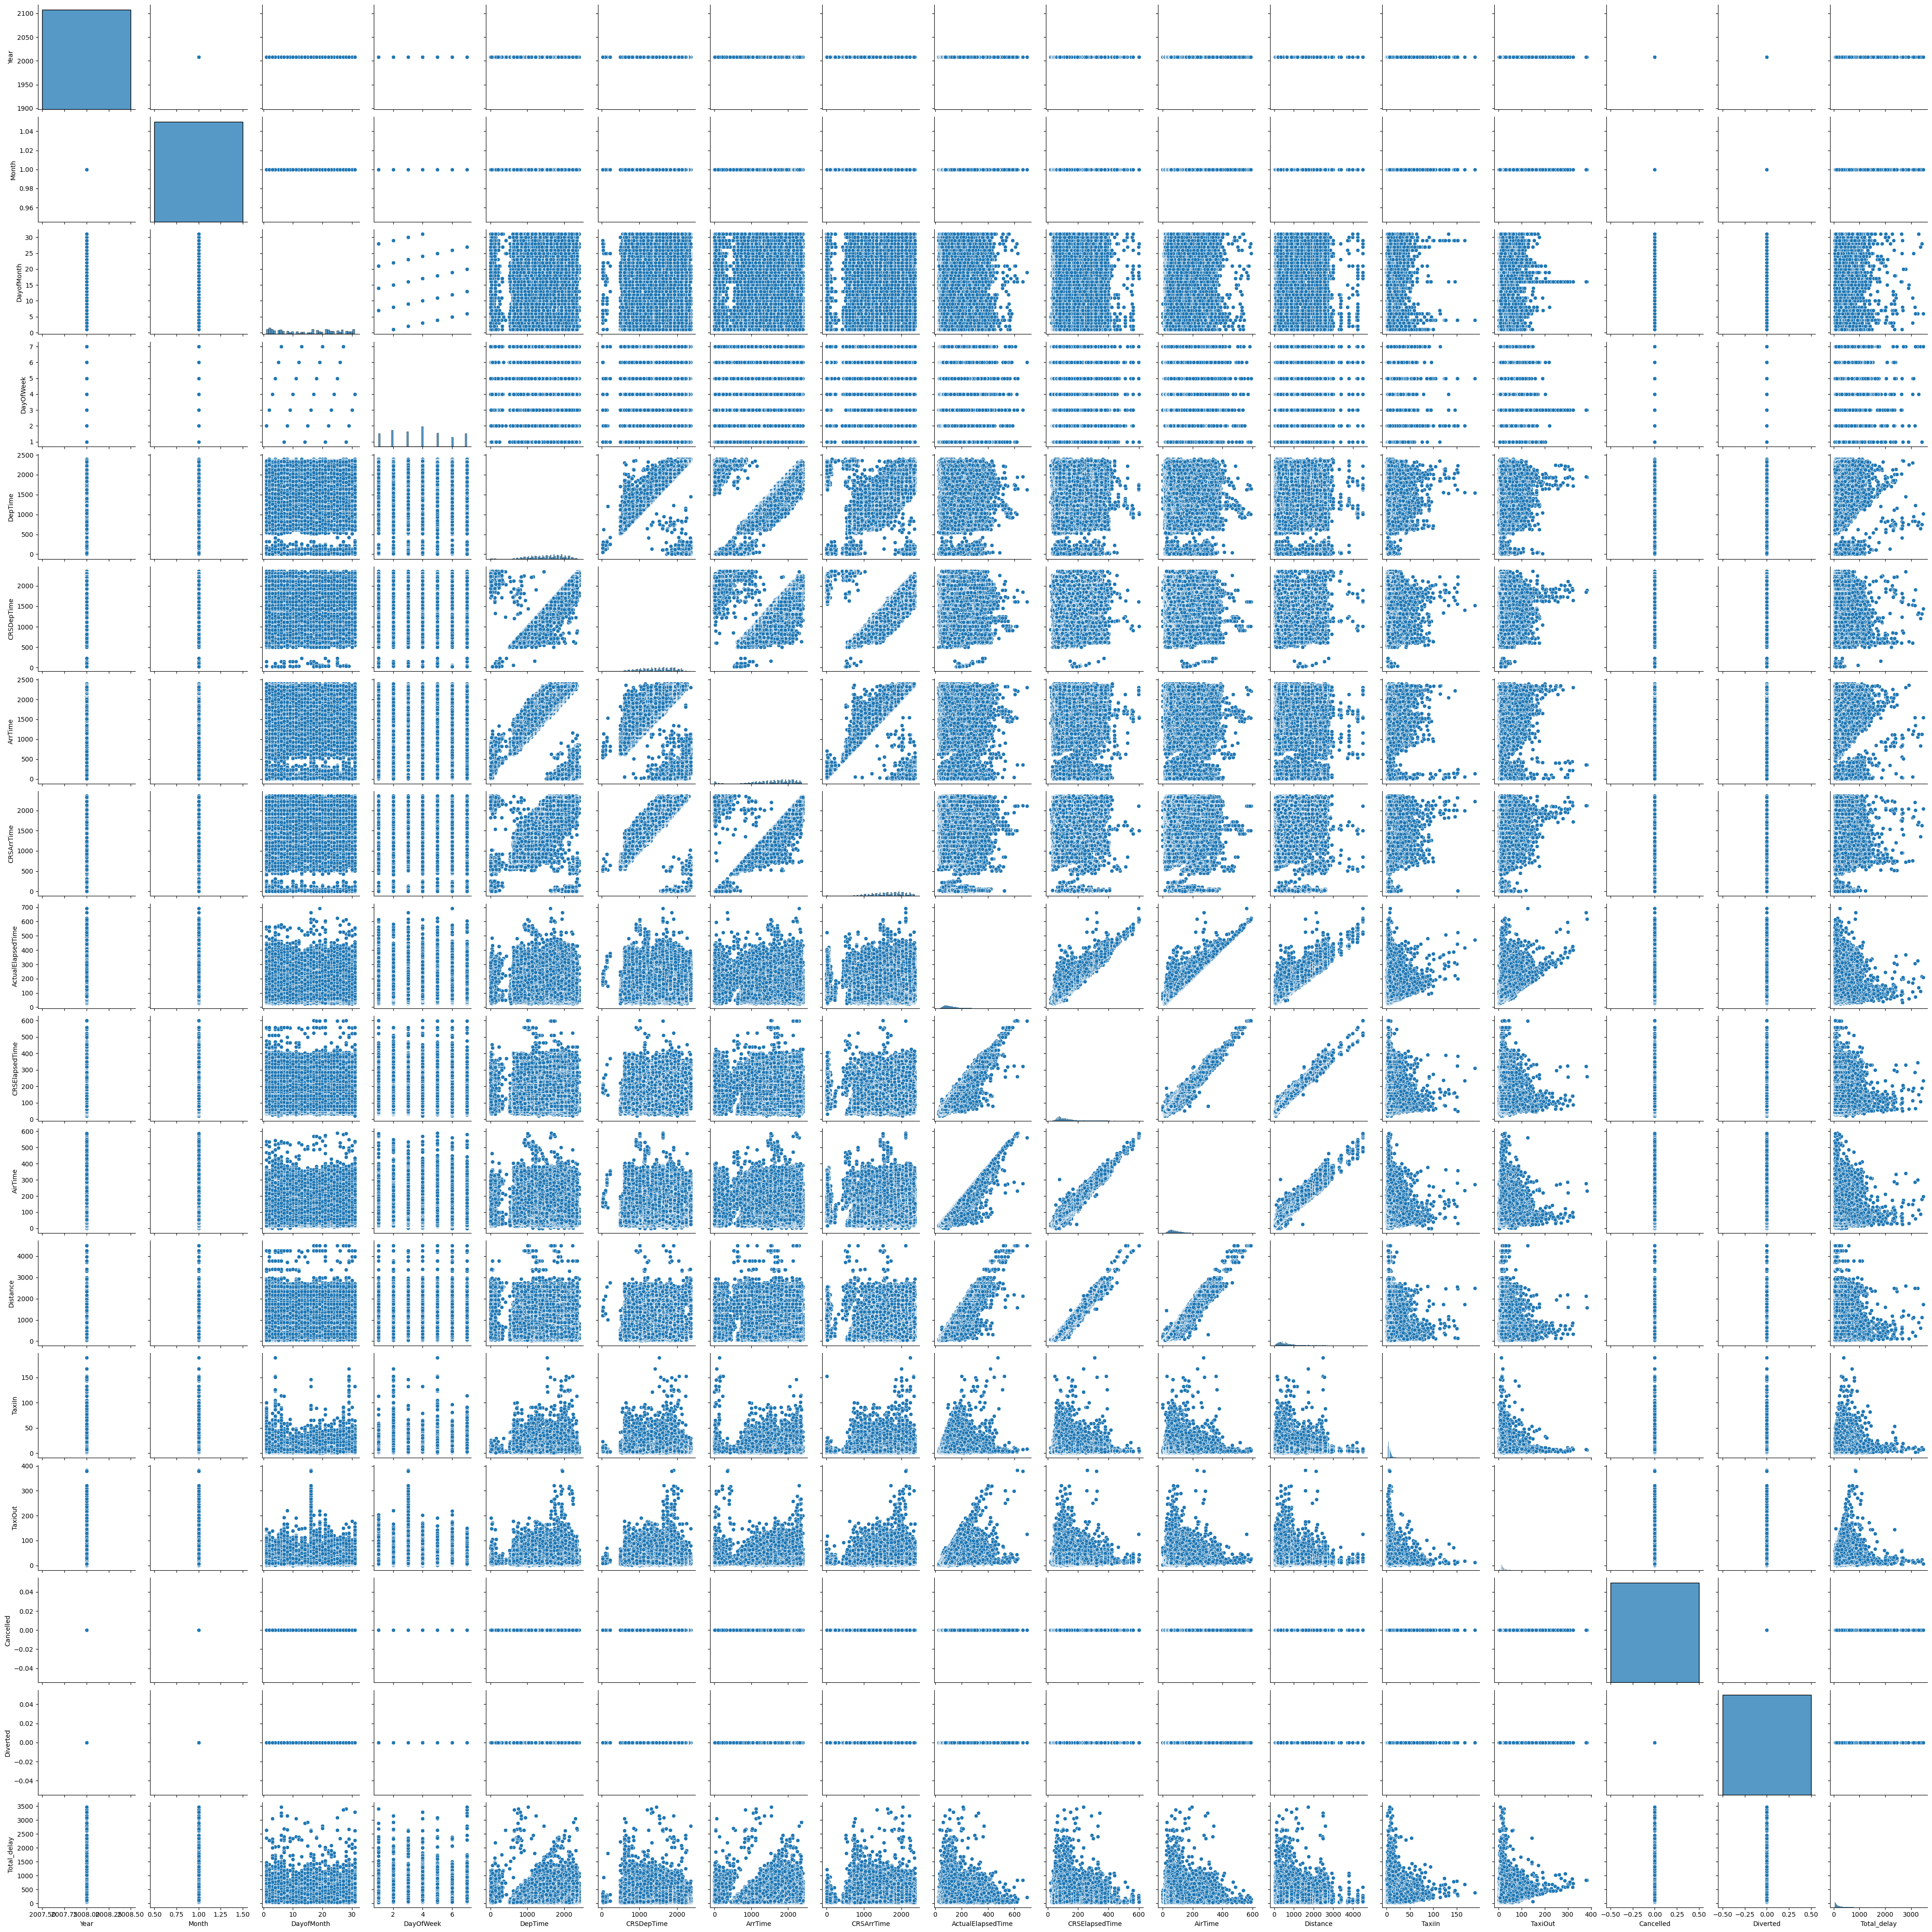

In [41]:
sns.pairplot(new_data)

### Plot heat map to show relationship between features 

<Axes: >

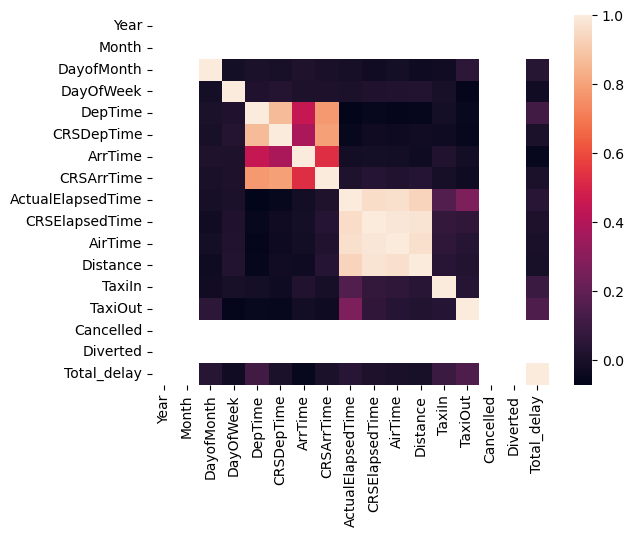

In [40]:
sns.heatmap(new_data.corr())

### Split dataset into input and target variable

In [15]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [16]:
data['Total_delay']=data['CarrierDelay']+data[ 'WeatherDelay']+data[ 'NASDelay']+data['SecurityDelay']+data[ 'LateAircraftDelay']+data['ArrDelay']+data[ 'DepDelay']

In [17]:
Total_delay=([ 34.,  57.,  80.,  15.,  16.,  37.,  19.,  47.,  64.,  72.,  29.,
        21., 304.,  35.,  49.,  38.,  30.,  26.,  31.,  36.,  62.,  43.,
        77.,  50.,  78.,  54.,  20.,  60.,  24.,  52.,  69.,  55., 210.,
        17.,  18.,  32.,  51.,  63., 112.,  33.,  39.,  22., 254.,  41.,
        27.,  59.,  25., 115.,  40.,  53.,  93.,  71.,  58.,  84.,  28.,
        65.,  56.,  42., 268.,  88., 139., 176.,  48., 114.,  23.,  75.,
        74.,  76.,  96.,  66., 118.,  70., 203., 129., 131., 184.,  46.,
        44., 288.,  86.,  68.,  90., 107., 163.,  67., 202.,  95., 178.,
        91.,  45.,  81.,  97., 220., 103.,  82., 144., 106., 132., 126.,
       108.,  92., 276., 215.,  79., 120.,  94.,  89.,  61., 130.,  87.,
       104.,  98., 147., 105.,  73., 141.,  83., 121., 109., 119., 159.,
       146., 154., 111., 113., 266.,  99., 207., 123., 166., 137., 133.,
        85., 110., 100., 164., 152., 116., 102., 127., 122., 175., 158.,
       172., 150., 185., 169., 117., 177., 124., 135., 224., 101., 236.,
       171., 196., 237., 238., 216., 208., 228., 168., 179., 161., 134.,
       183., 191., 125., 246., 160., 189., 143., 233., 270., 156., 170.,
       165., 151., 153., 173., 136., 142., 244., 190., 239., 500., 218.,
       167., 162., 206., 296., 213., 204., 128., 441., 181., 198., 186.,
       138., 149., 182., 221., 157., 222., 229., 140., 148., 382., 225.,
       257., 223., 197., 300., 383., 248., 211., 231., 305., 366., 327.,
       250.])


In [18]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'Total_delay'],
      dtype='object')

In [19]:
new_data=data.drop(columns=['ArrDelay', 'DepDelay','CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'])

In [20]:
new_data.head()

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
3   2008      1           3          4   1829.0        1755   1959.0   
5   2008      1           3          4   1937.0        1830   2037.0   
7   2008      1           3          4   1644.0        1510   1845.0   
9   2008      1           3          4   1452.0        1425   1640.0   
11  2008      1           3          4   1323.0        1255   1526.0   

    CRSArrTime  ActualElapsedTime  CRSElapsedTime  AirTime  Distance  TaxiIn  \
3         1925               90.0            90.0     77.0       515     3.0   
5         1940              240.0           250.0    230.0      1591     3.0   
7         1725              121.0           135.0    107.0       828     6.0   
9         1625              228.0           240.0    213.0      1489     7.0   
11        1510              123.0           135.0    110.0       838     4.0   

    TaxiOut  Cancelled  Diverted  Total_delay  
3      10.0          0         0        102.0  
5       7.0          0         0        181.0  
7       8.0          0         0        254.0  
9       8.0          0         0         57.0  
11      9.0          0         0         60.0

In [21]:
new_data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted',
       'Total_delay'],
      dtype='object')

In [22]:
x=new_data.drop(columns=['Total_delay'])
y=new_data['Total_delay']

### Standardize with StandardScaler

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()

In [25]:
x_scaled=scaler.fit_transform(x)

In [26]:
x=pd.DataFrame(x_scaled,columns=x.columns)

### Split the dataset into training and testing 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Check the shape of the x_train & x_test

In [29]:
x_train.shape

(79290, 16)

In [30]:
x_test.shape

(19823, 16)

# <span style = "color: orange"> Machine learning model </span>

## Linear regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model=LinearRegression()

In [33]:
model.fit(x_train,y_train)

LinearRegression()

### Make prediction with x_test

In [34]:
pred=model.predict(x_test)

## <span style = "color: purple"> Evaluate the model </span>

Assess the performance of the model using appropriate evaluation metrics. For linear regression, common metrics include:
###### Mean Squared Error (MSE)
##### Mean absolute percentage Error
##### R-squared (Coefficient of Determination)
##### Mean Absolute Error (MAE)

### Mean Squared Error

In [35]:
from sklearn import metrics

In [36]:
metrics.mean_squared_error(pred,y_test)

27107.20184572197

### Mean absolute percentage Error

In [37]:
metrics.mean_absolute_percentage_error(pred,y_test)

0.5941926655626028

### R-squared

In [38]:
metrics.r2_score(pred,y_test)

-8.832947212232018

### Mean Absolute Error 

In [39]:
metrics.mean_absolute_error(pred,y_test)

106.34087361337033